In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [56]:
iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                names=["sepal_length", "sepal_width", "petal_length", "petal_width", "target"])
krkopt_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data",
                names=["White_King_file", "White_King_rank", "White_Rook_file", "White_Rook_rank", "Black_King_file", "Black_King_rank", "target"])

In [57]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [58]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target           object
dtype: object

In [61]:
krkopt_df.head()

,White_King_file,White_King_rank,White_Rook_file,White_Rook_rank,Black_King_file,Black_King_rank,target
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [62]:
krkopt_df.dtypes

White_King_file    object
White_King_rank     int64
White_Rook_file    object
White_Rook_rank     int64
Black_King_file    object
Black_King_rank     int64
target             object
dtype: object

In [63]:
krkopt_df["White_King_file"] = lb_make.fit_transform(krkopt_df["White_King_file"])

krkopt_df["White_Rook_file"] = lb_make.fit_transform(krkopt_df["White_Rook_file"])

krkopt_df["Black_King_file"] = lb_make.fit_transform(krkopt_df["Black_King_file"])

krkopt_df["target"] = lb_make.fit_transform(krkopt_df["target"])

In [64]:
krkopt_df.head()

,White_King_file,White_King_rank,White_Rook_file,White_Rook_rank,Black_King_file,Black_King_rank,target
0,0,1,1,3,2,2,0
1,0,1,2,1,2,2,0
2,0,1,2,1,3,1,0
3,0,1,2,1,3,2,0
4,0,1,2,2,2,1,0


In [39]:

datasets = {
    "iris" : [iris_df.to_numpy()[:, 0:4], iris_df.to_numpy()[:, 4], iris_df.shape[0]],
    "krkopt" : [pd.get_dummies(krkopt_df).to_numpy()[:, 0:6], pd.get_dummies(krkopt_df).to_numpy()[:, 6], krkopt_df.shape[0]]
}


In [47]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

=== iris ===


/home/romgrelier/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


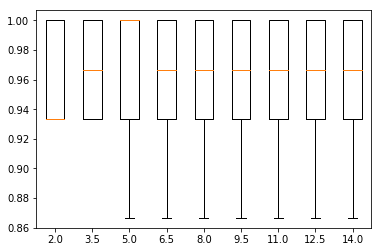

=== krkopt ===


/home/romgrelier/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


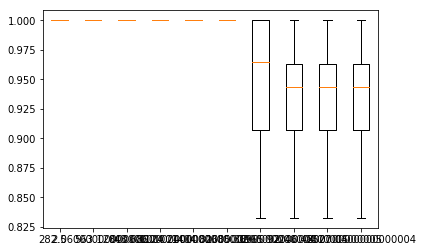

In [41]:
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

for name, df in datasets.items():
    print(f"=== {name} ===")
    x_train = df[0]
    y_train = df[1]
    N = df[2]
    
    score_record = []
    leaf_count = []
    
    # build classifier
    clfs = {}
    for i in np.arange(2, N * 0.1, (N * 0.1)/10):
        clfs[f"Decision Tree min_samples_leaf={int(i)}"] = tree.DecisionTreeClassifier(min_samples_leaf=int(i))
        leaf_count.append(i)

    # build models
    for name, clf in clfs.items():
        scores = cross_val_score(clf, x_train, y_train, cv=10)
        score_record.append(scores)

    fig = plt.figure()
    plt.boxplot(score_record)
    ax = fig.add_subplot(111)
    ax.set_xticklabels(leaf_count)
    plt.show()

    #predict_proba = model.predict_proba(x_test)
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba[:, 1], pos_label=1)
    #auc = metrics.auc(fpr, tpr)
    #print("{} : {}".format(name, auc))
    #plt.plot(fpr, tpr, label=name)
    #plt.legend()
    #scores = cross_val_score(clf, iris.data, iris.target, cv=10)

In [ ]:
results = {}

for name, clf in clfs.items():
    results[name] = []
    for i in range(len(accuracy_record)):
        results[name].append(i)

results_df = pd.DataFrame(data=results)